In [0]:
import os
import pickle
import numpy as np
import pandas as pd
from PIL import Image
from google.colab import drive
from tqdm import tqdm
import cv2

In [7]:


drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
def mountDir(dir, subdir = '', path = 'drive/My Drive/'):
  
    drive.mount('/content/drive')
    print(os.getcwd())
    if subdir == '':
        os.chdir(path + dir)
    else:
        
        os.chdir(path + dir + '/' + subdir)
    print(os.getcwd())
    # !ls -la

def storeData(data, filename = 'dump'):

    pickle.dump(data, open(filename + '.pickle', 'wb') )  
    print(filename, '.pickle saved!')

def loadData(filename = 'dump'):     

    filename += '.pickle'
    data = pickle.load(open(filename, 'rb'))  
    print(filename, ' loaded!')
    
    return data


In [9]:

mountDir('/pgm_project')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content
/content/drive/My Drive/pgm_project


In [10]:
ls -la

total 527632
-rw------- 1 root root      3731 May  8 16:07  2-1.png
-rw------- 1 root root       357 May  8 16:07  2.png
-rw------- 1 root root      3369 May  8 16:08  3-1.png
-rw------- 1 root root       323 May  8 16:08  3.png
-rw------- 1 root root      3553 May  8 16:08  4-1.png
-rw------- 1 root root       357 May  8 16:08  4.png
-rw------- 1 root root      3628 May  8 16:08  5-1.png
-rw------- 1 root root       338 May  8 16:08  5.png
-rw------- 1 root root   5997210 May  5 20:15  df_flattened
-rw------- 1 root root  88283968 May  8 15:27  dis_model20.h5
-rw------- 1 root root      3535 May  8 16:07 'download (1).png'
-rw------- 1 root root       345 May  8 16:07  download.png
-rw------- 1 root root  96663144 May  8 15:27  gan_model20.h5
-rw------- 1 root root  25033048 May  8 15:27  gen_model20.h5
drwx------ 2 root root      4096 May  6 14:21  kkanji2/
-rw------- 1 root root 324290560 Mar 29 09:38  kkanji.tar


In [11]:
import os
import pickle
import numpy as np
import pandas as pd
from PIL import Image

def loadData(path):
    images=[]
    c1=0
    for folder in tqdm(os.listdir(path)):
        folder_path = path+folder
        #print(folder_path)
        c1+=1
        if c1==50:
          break
        for filename in os.listdir(folder_path):
            cur_path = folder_path+"//"+filename
            im = np.array(Image.open(cur_path))
            images.append(im.ravel())
            # images.append(im)

    print("Number of images: ", len(images))
    # df = pd.DataFrame(data=images)
    
    return images

path = '/content/drive/My Drive/pgm_project//kkanji2//'

data1=loadData(path)


  1%|▏         | 49/3832 [04:33<1:39:12,  1.57s/it]

Number of images:  1180


In [0]:
data1[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [0]:
file=[]
for i in data1:
  i=i.reshape(64,64,1)
  i=cv2.cvtColor(i,cv2.COLOR_GRAY2RGB)
  file.append(i)


In [0]:
#file is a list of images

In [29]:
len(file)

1180

In [0]:
import numpy as np
import pandas as pd

import os

import cv2
from PIL import Image
import matplotlib.pyplot as plt


from keras.layers.core import Activation
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import UpSampling2D
from keras.layers import Input
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.models import Model
from keras.layers.advanced_activations import LeakyReLU, PReLU
from keras.layers import add
from keras.layers import Dense, Activation, Flatten

import matplotlib.pyplot as plt
plt.switch_backend('agg')
from keras.applications.vgg19 import VGG19
from keras.layers.convolutional import UpSampling2D
from keras.models import Model
from keras.optimizers import SGD, Adam, RMSprop
import keras
import keras.backend as K
from keras.layers import Lambda, Input
import tensorflow as tf
import skimage.transform
from skimage import data, io, filters
import numpy as np
from numpy import array
from skimage.transform import rescale, resize
import os
from google.colab.patches import cv2_imshow

%matplotlib inline


GENERATOR MODEL

In [0]:
# Residual block
def res_block_gen(model, kernal_size, filters, strides):    
    
    gen = model
    
    model = Conv2D(filters = filters, kernel_size = kernal_size, strides = strides, padding = "same")(model)
    model = BatchNormalization(momentum = 0.5)(model)
    # Using Parametric ReLU
    model = PReLU(alpha_initializer='zeros', alpha_regularizer=None, alpha_constraint=None, shared_axes=[1,2])(model)
    model = Conv2D(filters = filters, kernel_size = kernal_size, strides = strides, padding = "same")(model)
    model = BatchNormalization(momentum = 0.5)(model)
        
    model = add([gen, model])
    
    return model
    
    
def up_sampling_block(model, kernal_size, filters, strides):
    
  
    model = Conv2D(filters = filters, kernel_size = kernal_size, strides = strides, padding = "same")(model)
    model = UpSampling2D(size = 2)(model)
    model = LeakyReLU(alpha = 0.2)(model)
    
    return model
  
class Generator(object):
    def __init__(self, noise_shape):
        
        self.noise_shape = noise_shape
    def generator(self):
        
        gen_input = Input(shape = self.noise_shape)
     
        model = Conv2D(filters = 64, kernel_size = 9, strides = 1, padding = "same")(gen_input)
        model = PReLU(alpha_initializer='zeros', alpha_regularizer=None, alpha_constraint=None, shared_axes=[1,2])(model)
        
        gen_model = model
        
        # Using 16 Residual Blocks
        for index in range(16):
            model = res_block_gen(model, 3, 64, 1)
     
        model = Conv2D(filters = 64, kernel_size = 3, strides = 1, padding = "same")(model)
        model = BatchNormalization(momentum = 0.5)(model)
        model = add([gen_model, model])
     
        # Using 2 UpSampling Blocks
        for index in range(2):
            model = up_sampling_block(model, 3, 256, 1)
     
        model = Conv2D(filters = 3, kernel_size = 9, strides = 1, padding = "same")(model)
        model = Activation('tanh')(model)
    
        generator_model = Model(inputs = gen_input, outputs = model)
        return generator_model


DISCRIMINATOR MODEL

In [0]:

def discriminator_block(model, filters, kernel_size, strides):
    
    
    model = Conv2D(filters = filters, kernel_size = kernel_size, strides = strides, padding = "same")(model)
    model = BatchNormalization(momentum = 0.5)(model)
    model = LeakyReLU(alpha = 0.2)(model)
    
    return model
  
class Discriminator(object):

    def __init__(self, image_shape):
        
        self.image_shape = image_shape
    
    def discriminator(self):
        
        dis_input = Input(shape = self.image_shape)
        
        model = Conv2D(filters = 64, kernel_size = 3, strides = 1, padding = "same")(dis_input)
        model = LeakyReLU(alpha = 0.2)(model)
        
        model = discriminator_block(model, 64, 3, 2)
        model = discriminator_block(model, 128, 3, 1)
        model = discriminator_block(model, 128, 3, 2)
        model = discriminator_block(model, 256, 3, 1)
        model = discriminator_block(model, 256, 3, 2)
       
        
        model = Flatten()(model)
        model = Dense(1024)(model)
        model = LeakyReLU(alpha = 0.2)(model)
       
        model = Dense(1)(model)
        model = Activation('sigmoid')(model) 
        
        discriminator_model = Model(inputs = dis_input, outputs = model)
        
        return discriminator_model

GAN NETWORK (GENERATOR + DISCRIMINATOR)


In [0]:

def gan_merge(discriminator, shape, generator, optimizer):
    discriminator.trainable = False
    gan_input = Input(shape=shape)
    x = generator(gan_input)
    gan_output = discriminator(x)
    gan = Model(inputs=gan_input, outputs=[x,gan_output])
    gan.compile(loss=[vgg_loss, "binary_crossentropy"],
                loss_weights=[1., 1e-3],
                optimizer=optimizer)

    return gan

VGG LOSS

In [0]:
def vgg_loss(y_true, y_pred):
    
    vgg19 = VGG19(include_top=False, weights='imagenet', input_shape=image_shape)
    vgg19.trainable = False
    for l in vgg19.layers:
        l.trainable = False
    loss_model = Model(inputs=vgg19.input, outputs=vgg19.get_layer('block5_conv4').output)
    loss_model.trainable = False
    return K.mean(K.square(loss_model(y_true) - loss_model(y_pred)))


In [0]:
def plot_images(generator, examples=3 ):
    
    random_number = np.random.randint(0, x_test_hr.shape[0], size=examples)
    batch_high_res = denorm(x_test_hr[random_number])
    batch_low_res = x_test_lr[random_number]
    generator_img = generator.predict(batch_low_res)
    final_image = denorm(generator_img)
    batch_low_res = denorm(batch_low_res)
  
    cv2_imshow(batch_low_res[1]) 
        
    cv2_imshow(final_image[1] )
    
    cv2_imshow(batch_high_res[1])
    
    


In [0]:
def high_res_images(images):
    highres = array(images)
    return highres

def low_res_images(real , down_scale_factor):
    
    im = []
    for img in  range(len(real)):
        im.append(cv2.resize(real[img], (real[img].shape[1]//down_scale_factor,real[img].shape[0]//down_scale_factor), interpolation = cv2.INTER_CUBIC))
    lowres = array(im)
    return lowres

def norm(x):

    return (x.astype(np.float32) - 127.5)/127.5 
    
def denorm(x):
    x = (x + 1) * 127.5
    return x.astype(np.uint8) 



data loading 
complete
data processed








  0%|          | 0/20 [00:00<?, ?it/s]

--------------- Epoch 1 ---------------
loss_gan [0.00063926313, 9.580407e-08, 0.6391673]
loss_gan [0.000685126, 6.9117654e-08, 0.68505687]
loss_gan [0.0003868058, 8.370118e-08, 0.3867221]
loss_gan [0.00048474572, 5.6454745e-08, 0.48468924]
loss_gan [0.0002426979, 4.109862e-08, 0.2426568]
loss_gan [0.0006516938, 3.9308343e-08, 0.6516545]
loss_gan [0.0016746365, 4.761588e-08, 1.6745888]
loss_gan [0.0005620503, 4.555947e-08, 0.56200475]
loss_gan [0.00047153316, 3.7321392e-08, 0.47149584]








  5%|▌         | 1/20 [00:52<16:33, 52.27s/it]

loss_gan [0.00026236376, 6.4149155e-08, 0.2622996]
--------------- Epoch 2 ---------------
loss_gan [0.00025083206, 4.1157357e-08, 0.2507909]
loss_gan [0.0007493748, 4.1229516e-08, 0.74933356]
loss_gan [0.0010171644, 6.265528e-08, 1.0171018]
loss_gan [0.00051928405, 5.938876e-08, 0.51922464]
loss_gan [0.0005053617, 4.5915264e-08, 0.5053158]
loss_gan [0.0005731815, 4.565746e-08, 0.57313585]
loss_gan [0.00075108407, 5.8903513e-08, 0.75102514]
loss_gan [0.00042879584, 5.088601e-08, 0.42874494]
loss_gan [0.0006918133, 4.3267065e-08, 0.69177]








 10%|█         | 2/20 [01:05<12:08, 40.48s/it]

loss_gan [0.0004364051, 4.1446413e-08, 0.43636364]
--------------- Epoch 3 ---------------
loss_gan [0.00020041678, 5.6107943e-08, 0.20036066]
loss_gan [0.00031445178, 4.4349193e-08, 0.3144074]
loss_gan [0.00046102318, 5.6291015e-08, 0.46096689]
loss_gan [0.0011131726, 4.1013564e-08, 1.1131316]
loss_gan [0.00020463356, 4.651448e-08, 0.20458704]
loss_gan [0.00037326085, 3.7301287e-08, 0.3732235]
loss_gan [0.0005313253, 6.0366546e-08, 0.5312649]
loss_gan [0.00014727685, 4.8039684e-08, 0.1472288]
loss_gan [0.000340018, 5.2467545e-08, 0.33996552]








 15%|█▌        | 3/20 [01:17<09:06, 32.15s/it]

loss_gan [0.00040743622, 6.293224e-08, 0.40737328]
--------------- Epoch 4 ---------------
loss_gan [0.0003396018, 5.1927778e-08, 0.33954987]
loss_gan [0.0008207421, 5.175691e-08, 0.82069033]
loss_gan [0.00032932757, 4.4860137e-08, 0.3292827]
loss_gan [0.00020373422, 3.7651827e-08, 0.20369656]
loss_gan [0.0005773676, 4.6112365e-08, 0.57732147]
loss_gan [0.0002959591, 6.32436e-08, 0.29589584]
loss_gan [0.0003139971, 5.08432e-08, 0.31394625]
loss_gan [4.7239977e-05, 5.3985875e-08, 0.047185987]
loss_gan [0.00014754936, 6.436157e-08, 0.14748499]








 20%|██        | 4/20 [01:30<07:02, 26.40s/it]

loss_gan [0.00026217868, 6.750809e-08, 0.26211116]
--------------- Epoch 5 ---------------
loss_gan [0.00022235373, 5.385805e-08, 0.22229986]
loss_gan [0.00029774624, 4.8191538e-08, 0.29769802]
loss_gan [0.00019995222, 7.834843e-08, 0.19987386]
loss_gan [0.00025826646, 5.3715247e-08, 0.25821272]
loss_gan [0.0005678455, 5.538838e-08, 0.56779003]
loss_gan [0.0005970978, 5.4372066e-08, 0.5970434]
loss_gan [0.00029513752, 5.6568354e-08, 0.29508093]
loss_gan [0.0004813427, 5.5123003e-08, 0.48128754]
loss_gan [0.00043807618, 7.7296924e-08, 0.43799886]
loss_gan [0.00049835833, 4.0337e-08, 0.49831796]


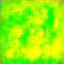

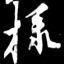







 25%|██▌       | 5/20 [01:44<05:37, 22.50s/it]

--------------- Epoch 6 ---------------
loss_gan [0.00016391797, 7.365779e-08, 0.1638443]
loss_gan [0.00015415924, 7.768931e-08, 0.15408154]
loss_gan [0.00022434961, 5.481337e-08, 0.22429478]
loss_gan [0.00039423842, 1.0274758e-07, 0.39413565]
loss_gan [0.00040023754, 9.4675116e-08, 0.40014285]
loss_gan [0.00034661114, 8.118308e-08, 0.34652996]
loss_gan [0.00043653182, 1.3091544e-07, 0.4364009]
loss_gan [0.00047027637, 6.5554076e-08, 0.4702108]
loss_gan [0.0003280873, 6.925141e-08, 0.32801804]








 30%|███       | 6/20 [01:57<04:35, 19.70s/it]

loss_gan [0.0004984763, 1.3460502e-07, 0.49834174]
--------------- Epoch 7 ---------------
loss_gan [0.00023077802, 9.548395e-08, 0.23068252]
loss_gan [0.00040083448, 1.2729905e-07, 0.40070716]
loss_gan [0.00052243256, 9.087158e-08, 0.52234167]
loss_gan [0.00016238842, 1.008989e-07, 0.1622875]
loss_gan [0.0002335496, 1.689262e-07, 0.23338065]
loss_gan [0.00010984036, 1.1565321e-07, 0.1097247]
loss_gan [0.00039304476, 1.1815027e-07, 0.39292657]
loss_gan [0.0005674812, 1.288527e-07, 0.5673523]
loss_gan [0.00038782947, 1.6840644e-07, 0.38766104]








 35%|███▌      | 7/20 [02:10<03:51, 17.80s/it]

loss_gan [0.00013470839, 2.3814545e-07, 0.13447024]
--------------- Epoch 8 ---------------
loss_gan [0.0004533471, 2.6508542e-07, 0.453082]
loss_gan [0.00020327567, 2.791744e-07, 0.20299649]
loss_gan [0.0006441049, 3.0434916e-07, 0.6438005]
loss_gan [0.00044112583, 2.75283e-07, 0.44085053]
loss_gan [0.0004809815, 3.2681382e-07, 0.48065466]
loss_gan [0.00047802945, 2.8646843e-07, 0.47774297]
loss_gan [0.00011895412, 2.0596028e-07, 0.11874816]
loss_gan [0.00015741852, 3.5399586e-07, 0.15706451]
loss_gan [0.00036355984, 3.4246705e-07, 0.36321735]








 40%|████      | 8/20 [02:24<03:17, 16.47s/it]

loss_gan [0.00032188775, 3.049971e-07, 0.32158273]
--------------- Epoch 9 ---------------
loss_gan [0.00064294075, 3.6102495e-07, 0.64257973]
loss_gan [0.0005053105, 3.6071987e-07, 0.50494975]
loss_gan [0.00042480623, 3.161498e-07, 0.42449006]
loss_gan [0.00015659077, 3.5851136e-07, 0.15623225]
loss_gan [0.00041691706, 2.3967442e-07, 0.41667736]
loss_gan [0.00027844, 3.1418716e-07, 0.27812582]
loss_gan [0.00039145732, 3.7004511e-07, 0.39108723]
loss_gan [0.00045501222, 2.4283804e-07, 0.45476937]
loss_gan [0.00050111045, 3.682363e-07, 0.5007422]








 45%|████▌     | 9/20 [02:37<02:50, 15.48s/it]

loss_gan [0.0006023084, 3.640228e-07, 0.6019444]
--------------- Epoch 10 ---------------
loss_gan [0.00045244241, 3.0424917e-07, 0.45213816]
loss_gan [0.00041329535, 3.058322e-07, 0.4129895]
loss_gan [0.00023655061, 3.2736503e-07, 0.23622324]
loss_gan [0.00039677785, 3.2753204e-07, 0.39645028]
loss_gan [0.00047027975, 3.0780387e-07, 0.46997193]
loss_gan [0.0001784961, 2.4853057e-07, 0.17824757]
loss_gan [0.00019190396, 3.2875982e-07, 0.1915752]
loss_gan [0.00037410628, 3.3080403e-07, 0.37377548]
loss_gan [0.0004257626, 3.1038442e-07, 0.4254522]
loss_gan [0.00022900116, 3.7618722e-07, 0.22862497]


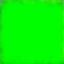

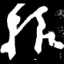







 50%|█████     | 10/20 [02:49<02:24, 14.46s/it]

--------------- Epoch 11 ---------------
loss_gan [0.00013443665, 3.2850522e-07, 0.13410813]
loss_gan [0.0003893502, 3.2856593e-07, 0.38902164]
loss_gan [0.00019384465, 2.4768252e-07, 0.19359696]
loss_gan [0.00036327736, 3.206727e-07, 0.36295667]
loss_gan [0.00022157565, 3.2069676e-07, 0.22125494]
loss_gan [0.0004056865, 3.2072757e-07, 0.40536577]
loss_gan [0.00051193486, 2.520273e-07, 0.5116828]
loss_gan [0.00055011455, 3.2861925e-07, 0.5497859]
loss_gan [0.00045690508, 2.4778643e-07, 0.45665726]








 55%|█████▌    | 11/20 [03:00<01:59, 13.28s/it]

loss_gan [0.00017675964, 3.7411147e-07, 0.17638552]
--------------- Epoch 12 ---------------
loss_gan [0.00020264556, 3.207109e-07, 0.20232484]
loss_gan [0.0005878349, 3.7831717e-07, 0.5874566]
loss_gan [0.0003396803, 3.3363273e-07, 0.33934662]
loss_gan [0.00030923283, 3.1880904e-07, 0.308914]
loss_gan [0.00049206073, 3.6929515e-07, 0.49169144]
loss_gan [0.00040313532, 3.3364142e-07, 0.40280166]
loss_gan [0.00019184555, 2.5240217e-07, 0.19159314]
loss_gan [0.00028729838, 2.524195e-07, 0.28704596]
loss_gan [0.000191721, 3.1918813e-07, 0.19140181]








 60%|██████    | 12/20 [03:13<01:45, 13.20s/it]

loss_gan [0.00040989582, 3.2861146e-07, 0.40956718]
--------------- Epoch 13 ---------------
loss_gan [0.00033660323, 3.743595e-07, 0.33622885]
loss_gan [0.0003157935, 3.6925147e-07, 0.31542423]
loss_gan [0.00030279436, 3.1925128e-07, 0.3024751]
loss_gan [0.00040676733, 3.7872843e-07, 0.40638858]
loss_gan [0.00018159884, 3.6925192e-07, 0.18122958]
loss_gan [0.00044448927, 3.2860152e-07, 0.44416064]
loss_gan [0.00018835465, 2.4786894e-07, 0.18810678]
loss_gan [0.0004844165, 2.478779e-07, 0.4841686]
loss_gan [0.00011842427, 2.5248156e-07, 0.11817178]








 65%|██████▌   | 13/20 [03:26<01:32, 13.16s/it]

loss_gan [0.00029289382, 3.1930168e-07, 0.2925745]
--------------- Epoch 14 ---------------
loss_gan [0.00043789775, 3.1217147e-07, 0.43758556]
loss_gan [0.00051893, 2.478937e-07, 0.5186821]
loss_gan [0.0002157951, 2.5250696e-07, 0.21554258]
loss_gan [0.00042912172, 3.6929785e-07, 0.4287524]
loss_gan [0.00016290807, 3.2860765e-07, 0.16257945]
loss_gan [0.0004076721, 3.205974e-07, 0.4073515]
loss_gan [0.00023968807, 3.3363617e-07, 0.23935443]
loss_gan [0.0005182044, 2.4788244e-07, 0.5179565]
loss_gan [0.00026334662, 2.5252217e-07, 0.26309407]








 70%|███████   | 14/20 [03:37<01:15, 12.63s/it]

loss_gan [0.00040509657, 3.1217382e-07, 0.40478438]
--------------- Epoch 15 ---------------
loss_gan [0.0005250546, 3.3362585e-07, 0.5247209]
loss_gan [0.00016809415, 3.6929202e-07, 0.16772485]
loss_gan [0.00039242825, 3.1215473e-07, 0.39211607]
loss_gan [0.0002678012, 3.6928168e-07, 0.2674319]
loss_gan [0.0003635078, 3.2052935e-07, 0.36318725]
loss_gan [0.0003275768, 3.2856784e-07, 0.3272482]
loss_gan [0.00015383026, 3.285632e-07, 0.15350169]
loss_gan [0.00020519781, 3.3355616e-07, 0.20486423]
loss_gan [0.0004585702, 3.6927446e-07, 0.4582009]
loss_gan [0.00032704842, 2.478102e-07, 0.32680058]


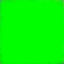

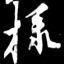







 75%|███████▌  | 15/20 [03:48<01:00, 12.01s/it]

--------------- Epoch 16 ---------------
loss_gan [0.00024990868, 3.7437422e-07, 0.24953431]
loss_gan [0.00047629155, 3.6927992e-07, 0.47592226]
loss_gan [0.00044955948, 3.6927986e-07, 0.4491902]
loss_gan [0.00027748768, 3.7437877e-07, 0.27711326]
loss_gan [0.00036527542, 3.7437977e-07, 0.364901]
loss_gan [0.00025228615, 3.193294e-07, 0.2519668]
loss_gan [0.00029329633, 2.5250574e-07, 0.2930438]
loss_gan [0.0002189082, 3.2049476e-07, 0.2185877]
loss_gan [0.00032068812, 3.6926411e-07, 0.32031885]








 80%|████████  | 16/20 [03:59<00:47, 11.84s/it]

loss_gan [0.00053749507, 3.1932487e-07, 0.5371757]
--------------- Epoch 17 ---------------
loss_gan [0.00033577497, 3.692615e-07, 0.33540568]
loss_gan [0.00025673435, 3.335422e-07, 0.2564008]
loss_gan [0.0003810539, 2.5250353e-07, 0.38080138]
loss_gan [0.00027484103, 3.121208e-07, 0.27452892]
loss_gan [0.00011795655, 2.5249932e-07, 0.11770405]
loss_gan [0.00012254473, 3.1933476e-07, 0.12222538]
loss_gan [0.00040229326, 3.6926394e-07, 0.40192395]
loss_gan [0.0002615152, 3.7875714e-07, 0.26113644]
loss_gan [0.00035076195, 3.6927042e-07, 0.35039267]








 85%|████████▌ | 17/20 [04:11<00:35, 11.74s/it]

loss_gan [0.00010104894, 3.3356002e-07, 0.10071538]
--------------- Epoch 18 ---------------
loss_gan [0.00028199243, 2.4783014e-07, 0.2817446]
loss_gan [0.0003261255, 3.2053572e-07, 0.32580495]
loss_gan [0.00022440223, 3.7877794e-07, 0.22402345]
loss_gan [0.00030649977, 3.2860572e-07, 0.30617115]
loss_gan [0.00028950843, 3.1219662e-07, 0.28919622]
loss_gan [0.00032474063, 3.693358e-07, 0.32437128]
loss_gan [0.00015192521, 3.787957e-07, 0.1515464]
loss_gan [0.0002552922, 2.5258052e-07, 0.2550396]
loss_gan [0.0004130877, 3.7447046e-07, 0.4127132]








 90%|█████████ | 18/20 [04:21<00:22, 11.25s/it]

loss_gan [0.00027433253, 3.7880164e-07, 0.2739537]
--------------- Epoch 19 ---------------
loss_gan [0.0005692337, 3.1941607e-07, 0.56891423]
loss_gan [0.00016807525, 3.2061223e-07, 0.16775464]
loss_gan [0.00021821128, 3.337098e-07, 0.21787757]
loss_gan [0.00019117532, 3.1225036e-07, 0.19086306]
loss_gan [0.00042632135, 2.4793513e-07, 0.4260734]
loss_gan [0.0004628731, 3.1225113e-07, 0.46256083]
loss_gan [0.00030217602, 3.1225102e-07, 0.30186376]
loss_gan [0.00053612323, 3.7446858e-07, 0.5357488]
loss_gan [0.00037234803, 3.693775e-07, 0.37197864]








 95%|█████████▌| 19/20 [04:32<00:11, 11.21s/it]

loss_gan [0.00046549368, 3.7444659e-07, 0.4651192]
--------------- Epoch 20 ---------------
loss_gan [0.00032103114, 3.336921e-07, 0.32069743]
loss_gan [0.00037901278, 3.1222282e-07, 0.37870052]
loss_gan [0.00015167797, 3.286243e-07, 0.15134934]
loss_gan [0.00012505791, 2.5257748e-07, 0.124805324]
loss_gan [0.0004629629, 3.6934244e-07, 0.46259353]
loss_gan [0.0004463241, 2.47895e-07, 0.44607615]


In [0]:
np.random.seed(10)
image_shape = file[0].shape
print("data loading ")

x_train = file[0:10]
x_test = file[10:15]

print("complete")



imhr = high_res_images(x_train)
imhr = norm(imhr)

imlr = low_res_images(x_train, 4)
imlr = norm(imlr)


x_test_hr = high_res_images(x_test)
x_test_hr = norm(x_test_hr)

x_test_lr = low_res_images(x_test, 4)
x_test_lr = norm(x_test_lr)

print("data processed")


def train(epochs, batch_size):

    down_scale_factor = 4
    
    batch_count = int(imhr.shape[0] / batch_size)
    shape = (image_shape[0]//down_scale_factor, image_shape[1]//down_scale_factor, image_shape[2])
    
    generator = Generator(shape).generator()
    discriminator = Discriminator(image_shape).discriminator()

    adam = Adam(lr=1E-4, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
    generator.compile(loss=vgg_loss, optimizer=adam)
    discriminator.compile(loss="binary_crossentropy", optimizer=adam)
    
    shape = (image_shape[0]//down_scale_factor, image_shape[1]//down_scale_factor, 3)
    gan = gan_merge(discriminator, shape, generator, adam)

    for e in tqdm(range(1, epochs+1)):
        print ('-'*15, 'Epoch %d' % e, '-'*15)
        for _ in range(batch_count):

            
            rand_nums = np.random.randint(0, imhr.shape[0], size=batch_size)
            
            image_batch_hr = imhr[rand_nums]
            image_batch_lr = imlr[rand_nums]
            generated_images_sr = generator.predict(image_batch_lr)

            real_data_Y = np.ones(batch_size) - np.random.random_sample(batch_size)*0.2
            fake_data_Y = np.random.random_sample(batch_size)*0.2
            
            discriminator.trainable = True
            
            # d_loss_real = discriminator.train_on_batch(image_batch_hr, real_data_Y)
            # d_loss_fake = discriminator.train_on_batch(generated_images_sr, fake_data_Y)
            # d_loss = 0.5 * np.add(d_loss_fake, d_loss_real)
            
            rand_nums = np.random.randint(0, imhr.shape[0], size=batch_size)
            image_batch_hr = imhr[rand_nums]
            image_batch_lr = imlr[rand_nums]

            gan_Y = np.ones(batch_size) - np.random.random_sample(batch_size)*0.2
            discriminator.trainable = False
            loss_gan = gan.train_on_batch(image_batch_lr, [image_batch_hr,gan_Y])
            
            # print("Loss HR , Loss LR, Loss GAN")
            print( "loss_gan" , loss_gan)

        if e % 5 == 0:
            plot_images( generator)
      

train(20,1) #epochs , batchsize

